## Fast.Ai - Lesson 1: Image Classification 2 ##

### Kaggle Bee or Wasp using Fast.Ai

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision.all import *
from fastai.imports import *
from fastai.vision.data import *
from fastai import *
import numpy as np
import fastai

In [3]:
print(fastai.__version__)

2.0.12


In [4]:
path = Path("data/BWasp")
path.ls()


(#6) [Path('data/BWasp/Bee'),Path('data/BWasp/BW.pkl'),Path('data/BWasp/models'),Path('data/BWasp/Not'),Path('data/BWasp/Other'),Path('data/BWasp/Wasp')]

In [5]:
np.random.seed(42)
#data = ImageDataLoaders.from_folder(path, train=".", valid_pct=0.2, size=256, num_workers=4).normalize(imagenet_stats)
data = ImageDataLoaders.from_folder(path, train=".", valid_pct=0.2, item_tfms=RandomResizedCrop(512, min_scale=0.75),
                                    bs=16,batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)],num_workers=0)


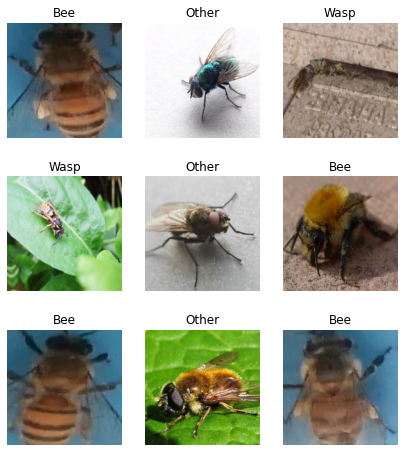

In [6]:
data.show_batch(nrows=3, figsize=(7,8))

### Trainining the model

In [7]:
learn = cnn_learner(data, resnet34, metrics=error_rate)

In [8]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.407996,0.277995,0.085377,02:34
1,0.312045,0.203664,0.063923,02:45
2,0.231830,0.159629,0.052102,02:45
3,0.178303,0.154487,0.053853,02:44


In [9]:
learn.save('res34_BW_Stage -1')

Path('data/BWasp/models/res34_BW_Stage -1.pth')

In [11]:
learn.load('res34_BW_Stage -1')

In [12]:
learn.unfreeze()

SuggestedLRs(lr_min=2.0892961401841602e-06, lr_steep=6.309573450380412e-07)

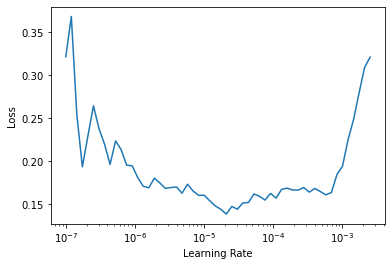

In [13]:
learn.lr_find()

In [14]:
learn.load('res34_BW_Stage -1')

In [15]:
learn.fit_one_cycle(2, lr_max=slice(1e-7,2e-7))

epoch,train_loss,valid_loss,error_rate,time
0,0.176420,0.154002,0.051226,02:48
1,0.188336,0.149160,0.049912,02:49


In [16]:
learn.save("res34_BW_test1_Stage -2")

Path('data/BWasp/models/res34_BW_test1_Stage -2.pth')

In [17]:
learn.load("res34_BW_Stage -1")

In [18]:
learn.fit_one_cycle(2, lr_max=slice(2e-6,2e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.182805,0.149094,0.049475,02:47
1,0.179008,0.145181,0.047285,02:49


In [19]:
learn.save("res34_BW_test2_Stage -2")

Path('data/BWasp/models/res34_BW_test2_Stage -2.pth')

In [ ]:
learn.load("res34_BW_test2_Stage -2")

In [20]:
learn.model = learn.model.cpu()

In [21]:
learn.export('BW_test2.pkl')

In [22]:
defaults.device = torch.device('cpu')

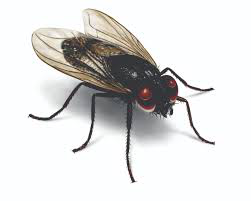

In [35]:
img = Image.open('Test/BW/test_06.jpg')
img
#img.resize((512,512))

In [24]:
l = load_learner(path/'BW_test2.pkl', cpu=True)

In [36]:
defaults.device  = torch.device('cpu')
defaults.device

device(type='cpu')

In [38]:
fnames=get_image_files('Test/BW/')
#fnames
pred_class,pred_idx,outputs = l.predict(fnames[5])
if pred_class =='Not':
    pred_class = 'Neither Bee nor Wasp'
pred_class

'Other'